#### 损失函数

In [ ]:
#单个数据均方误差
import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

#正解为2
t = [0,0,1,0,0,0,0,0,0,0]

#“2”的概率为0.6
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print(mean_squared_error(np.array(y), np.array(t)))

#“7”的概率为0.6
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print(mean_squared_error(np.array(y), np.array(t)))

In [ ]:
#单个数据交叉熵误差
import numpy as np

def cross_entropy_error(y, t):
    delta = 1e-7 #防止log(0)
    return -np.sum(t * np.log(y + delta))

#“2”的概率为0.6
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

#“7”的概率为0.6
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

In [ ]:
#mini_batch

import sys,os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)

#随机抽取10笔数据
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [ ]:
#one_hot表示
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y+1e-7)) / batch_size

#非one_hot表示
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t]+1e-7)) / batch_size

#### 数值微分

导数的定义：若函数$f(x)$在点$x_0$的某邻域内有定义，$f(x)$在$x_0$处可导，则$f(x)$在$x_0$处的导数$f'(x_0)$定义为：

$$f'(x_0)=\lim_{h\to 0}\frac{f(x_0+h)-f(x_0)}{h}$$

In [ ]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def function_2(x, y):
    return x**2 + y**2

# 创建x和y的网格
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
print(X.shape, Y.shape)

# 计算对应的z值
Z = function_2(X, Y)
print(Z.shape)

# 创建图形和轴
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制曲面
ax.plot_surface(X, Y, Z, cmap='viridis')

# 设置标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 显示图形
plt.show()

In [ ]:
print(numerical_diff(function_1, 5))
numerical_diff(function_1, 10)

def function_2(x):
    return np.sum(x**2)

#### 梯度

In [ ]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)#shape与x相同，元素都为0
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 还原值
        
    return grad

In [ ]:
print(numerical_gradient(function_2, np.array([3., 4.])))
print(numerical_gradient(function_2, np.array([0., 2.])))
print(numerical_gradient(function_2, np.array([3., 0.])))

In [ ]:
#梯度（下降、上升）法

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

In [ ]:
import sys, os
#将父类路径加入到系统路径中
sys.path.append(os.pardir)
import numpy as np
#引用其他文件下的函数
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:#一个实例变量，两个方法
    def __init__(self):
        self.W = np.random.randn(2,3) # 2 input, 3 output
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [ ]:
net = simpleNet()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

print(np.argmax(p))#输出最大值索引

t = np.array([0, 0, 1])#标签
print(net.loss(x, t))#输出损失

In [ ]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

In [ ]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

#### 学习算法的实现
1.mini_batch
2.计算梯度
3.更新参数
4.重复以上步骤

In [ ]:
#搭建两层神经网络

import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import *
from common.gradient import numerical_gradient

#params保存了权重参数，grads保存了权重参数的梯度
class TwoLayerNet:
    #类的初始化方法
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        #权重使用符合高斯分布的随机数初始化，偏置使用0初始化
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)                                                                                                                                                   
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
     
    #x是图像数据，t是正确解数据   
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
        
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [ ]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

#推理过程
x = np.random.rand(100, 784)#伪输入100笔
y = net.predict(x)
print(net.params['W1'].shape)

#计算梯度
x = np.random.rand(100, 784)#伪输入100笔
t = np.random.rand(100,10)#伪标签100笔

grads = net.numerical_gradient(x, t)
print(grads['W1'].shape)

In [ ]:
#mini-batch的实现

import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)#默认flatten=True

train_loss_list = []

#超参数
iters_num = 10000 #梯度法循环次数
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.7932666666666667, 0.7966
train acc, test acc | 0.8778166666666667, 0.8819
train acc, test acc | 0.8999333333333334, 0.9022
train acc, test acc | 0.9064833333333333, 0.9095
train acc, test acc | 0.9145, 0.9161
train acc, test acc | 0.92005, 0.9221
train acc, test acc | 0.92385, 0.9258
train acc, test acc | 0.9263666666666667, 0.9277
train acc, test acc | 0.9291333333333334, 0.93
train acc, test acc | 0.9332166666666667, 0.9333
train acc, test acc | 0.93615, 0.9359
train acc, test acc | 0.9372833333333334, 0.9382
train acc, test acc | 0.9403333333333334, 0.9414
train acc, test acc | 0.94285, 0.9439
train acc, test acc | 0.9439666666666666, 0.9439
train acc, test acc | 0.9453166666666667, 0.9452


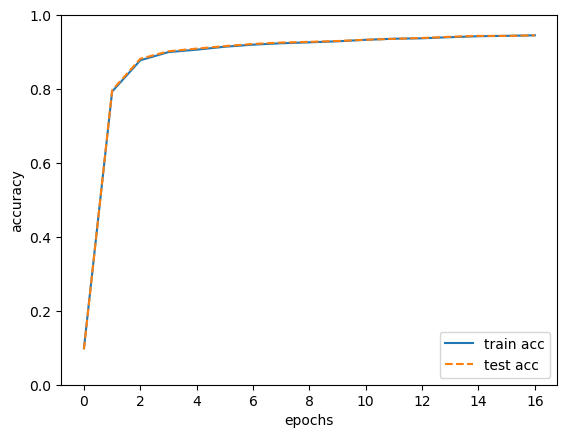

In [3]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

#超参数
iters_num = 10000  # 适当设定循环的次数
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

#平均每个epoch的重复次数，epoch是指训练集全部样本训练一次的更新次数
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:#每600次迭代打印一次训练集和测试集的准确率
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 绘制图形
markers = {'train': 'o', 'test': 's'}
#循环10000次，每600次打印一次准确率，x.shape=(17,)
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()